In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
import math

def rmsle2(y_true, y_pred):
    y = y_true
    """Root Mean Squared Logarithmic Error (RMSLE)"""
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

def rmsle(y, y0):
    assert len(y) == len(y0)
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y0), 2)))


# Utility functions

In [15]:
def get_train_valid(data_file):
    data = pd.read_hdf(data_file, 'data')
    X_train, X_valid = train_test_split(data, test_size=.1, random_state=0)
    y_train = X_train['target'].copy()
    del X_train['target']
    y_valid = X_valid['target'].copy()
    del X_valid['target']
    return X_train, X_valid, y_train, y_valid

def get_lr_score(data_file):
    X_train, X_valid, y_train, y_valid = get_train_valid(data_file)
    
    reg = LinearRegression(n_jobs=-1)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_valid)

    return rmsle(y_valid, y_pred)

from sklearn.ensemble import RandomForestRegressor

def get_rf_score(data_file):
    X_train, X_valid, y_train, y_valid = get_train_valid(data_file)
    
    reg = RandomForestRegressor(n_estimators=50)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_valid)

    return rmsle(y_valid, y_pred)

# Loop every dimention and produce LR score for every dimention

/home/evo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log1p


([<matplotlib.axis.XTick at 0x7ff7616734e0>,
 <a list of 7 Text xticklabel objects>)

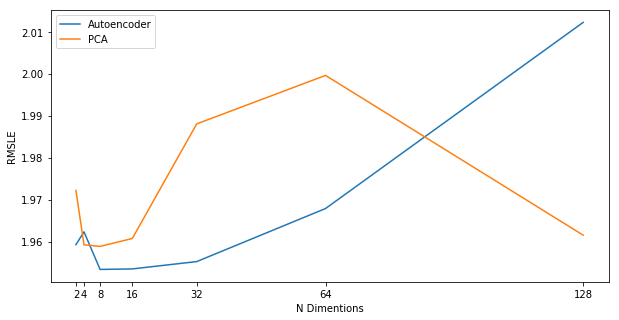

In [16]:
result = []
for i in [2, 4, 8, 16, 32, 64, 128]:
    data_file = 'ed_model_dirs/%d/result/train.h5' % i
    ed_score = get_lr_score(data_file)
    
    data_file = 'pca_result/%d/train.h5' % i
    pca_score = get_lr_score(data_file)
    
    result.append(dict(
        PCA=pca_score,
        Autoencoder=ed_score,
        dimentions=i
    ))
result = pd.DataFrame(result)
result.set_index('dimentions').sort_index().plot(figsize=(10,5))
plt.xlabel('N Dimentions')
plt.ylabel('RMSLE')
plt.xticks(np.array(dimentions))

# Loop every dimention and produce RF score for every dimention

2
4
8
16
32
64
128


([<matplotlib.axis.XTick at 0x7ff761416eb8>,
 <a list of 7 Text xticklabel objects>)

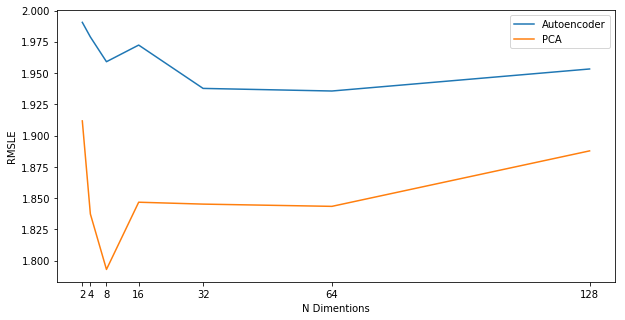

In [19]:
result = []
for i in [2, 4, 8, 16, 32, 64, 128]:
    print(i)
    data_file = 'ed_model_dirs/AAA%d/result/train.h5' % i
    ed_score = get_rf_score(data_file)
    
    data_file = 'pca_result/%d/train.h5' % i
    pca_score = get_rf_score(data_file)
    
    result.append(dict(
        PCA=pca_score,
        Autoencoder=ed_score,
        dimentions=i
    ))
result = pd.DataFrame(result)
result.set_index('dimentions').sort_index().plot(figsize=(10,5))
plt.xlabel('N Dimentions')
plt.ylabel('RMSLE')
plt.xticks(np.array(dimentions))

# Create the NN plot

2
4
8
16
32
64
128


/home/evo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log1p


([<matplotlib.axis.XTick at 0x7ff76161f630>,
 <a list of 7 Text xticklabel objects>)

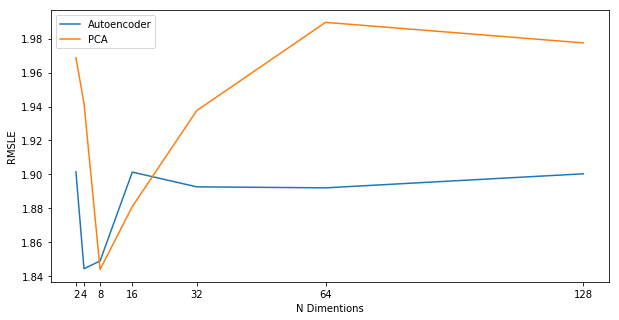

In [13]:
result = []
dimentions = [2, 4, 8, 16, 32, 64, 128]
for i in dimentions:
    print(i)
    data = pd.read_hdf('nn_model_dirs/ed_%d/result/valid.h5' % i, 'data')
    ed_score = rmsle(data['y_true'], data['target'])
    
    data = pd.read_hdf('nn_model_dirs/pca_%d/result/valid.h5' % i, 'data')
    pca_score = rmsle(data['y_true'], data['target'])
    
    result.append(dict(
        PCA=pca_score,
        Autoencoder=ed_score,
        dimentions=i
    ))
result = pd.DataFrame(result)
result.set_index('dimentions').sort_index().plot(figsize=(10,5))
plt.xlabel('N Dimentions')
plt.ylabel('RMSLE')
plt.xticks(np.array(dimentions))